# Cat Vs Dog Image Classification Using VGG16

## Data Preparation

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Exploratory Data Analysis (EDA)

In [4]:
import os

def get_folder_size_and_shape(folder_path):
    total_size = 0
    num_files = 0

    if not os.path.exists(folder_path):
        print(f"Error: The folder '{folder_path}' does not exist.")
        return None

    for root, dirs, files in os.walk(folder_path):
        num_files += len(files)
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
            else:
                print(f"Warning: File '{file_path}' could not be accessed.")

    return {"size_in_bytes": total_size, "number_of_files": num_files}

In [5]:
test_folder_path = r"/content/dogs_vs_cats/test"
test_folder_info = get_folder_size_and_shape(test_folder_path)

if test_folder_info:
    print(f"Test Folder - Size: {test_folder_info['size_in_bytes']} bytes, Files: {test_folder_info['number_of_files']}")

Test Folder - Size: 113168459 bytes, Files: 5000


In [6]:
train_folder_path = r"/content/dogs_vs_cats/train"
train_folder_info = get_folder_size_and_shape(train_folder_path)

if test_folder_info:
    print(f"Train Folder - Size: {train_folder_info['size_in_bytes']} bytes, Files: {train_folder_info['number_of_files']}")

Train Folder - Size: 458746917 bytes, Files: 20000


In [7]:
dog_folder_path_train = r"/content/dogs_vs_cats/train/dogs"
cat_folder_path_train = r"/content/dogs_vs_cats/train/cats"

dog_folder_info_train = get_folder_size_and_shape(dog_folder_path_train)
cat_folder_info_train = get_folder_size_and_shape(cat_folder_path_train)

print(f"Dog Folder (Train) - Size: {dog_folder_info_train['size_in_bytes']} bytes, Files: {dog_folder_info_train['number_of_files']}")
print(f"Cat Folder (Train) - Size: {cat_folder_info_train['size_in_bytes']} bytes, Files: {cat_folder_info_train['number_of_files']}")


Dog Folder (Train) - Size: 249199806 bytes, Files: 10000
Cat Folder (Train) - Size: 209547111 bytes, Files: 10000


In [8]:
dog_folder_path_test = r"/content/dogs_vs_cats/test/dogs"
cat_folder_path_test = r"/content/dogs_vs_cats/test/cats"

dog_folder_info_test = get_folder_size_and_shape(dog_folder_path_test)
cat_folder_info_test = get_folder_size_and_shape(cat_folder_path_test)

print(f"Dog Folder (Test) - Size: {dog_folder_info_test['size_in_bytes']} bytes, Files: {dog_folder_info_test['number_of_files']}")
print(f"Cat Folder (Test) - Size: {cat_folder_info_test['size_in_bytes']} bytes, Files: {cat_folder_info_test['number_of_files']}")


Dog Folder (Test) - Size: 60801748 bytes, Files: 2500
Cat Folder (Test) - Size: 52366711 bytes, Files: 2500


In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_labels(folder_path, num_images=3, size=(150, 150)):

    images = [file for file in os.listdir(folder_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, img_name in enumerate(images[:num_images]):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        img = img.resize(size, Image.Resampling.BILINEAR)

        axes[i].imshow(img)
        axes[i].set_title(img_name.split('.')[0])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

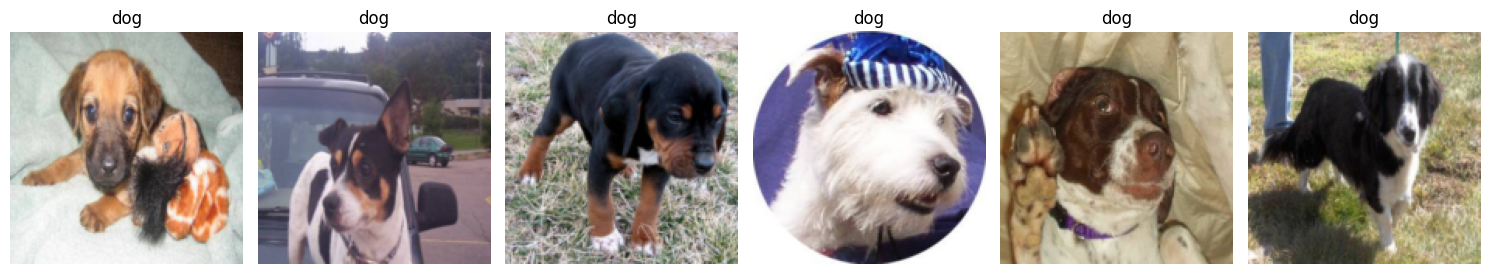

In [10]:
dog_folder_path = r"/content/dogs_vs_cats/train/dogs"
display_images_with_labels(dog_folder_path, num_images=6, size=(150, 150))

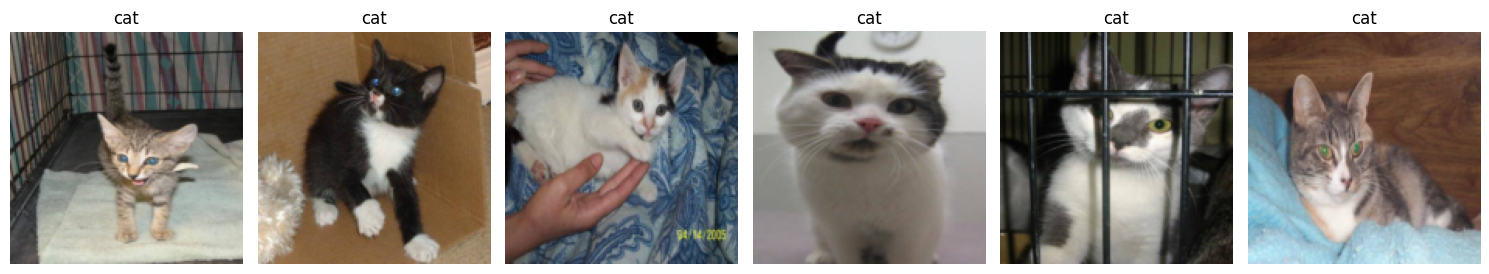

In [11]:
cats_folder_path = r"/content/dogs_vs_cats/test/cats"
display_images_with_labels(cats_folder_path, num_images=6, size=(150, 150))

## Data Training and Evaluation

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


In [40]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [41]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [42]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [43]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [44]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dropout(0.5))
# model.add(Dense(256,activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [46]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [47]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 262ms/step - accuracy: 0.7779 - loss: 5.0749 - val_accuracy: 0.9246 - val_loss: 3.9264
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 259ms/step - accuracy: 0.9173 - loss: 3.6743 - val_accuracy: 0.9396 - val_loss: 2.8878
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 240ms/step - accuracy: 0.9312 - loss: 2.7110 - val_accuracy: 0.9484 - val_loss: 2.1575
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 240ms/step - accuracy: 0.9420 - loss: 2.0259 - val_accuracy: 0.9466 - val_loss: 1.6509
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 240ms/step - accuracy: 0.9483 - loss: 1.5501 - val_accuracy: 0.9516 - val_loss: 1.2908
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 242ms/step - accuracy: 0.9548 - loss: 1.2167 - val_accuracy: 0.9562 - val_loss: 1.0337
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 245ms/step - accuracy: 0.9585 - loss: 0.9856 - val_accuracy: 0.9562 - val_loss: 0.8567
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 261ms/step - accuracy: 0.9614 -

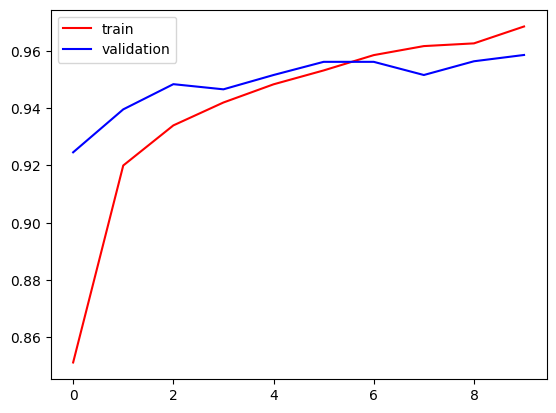

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

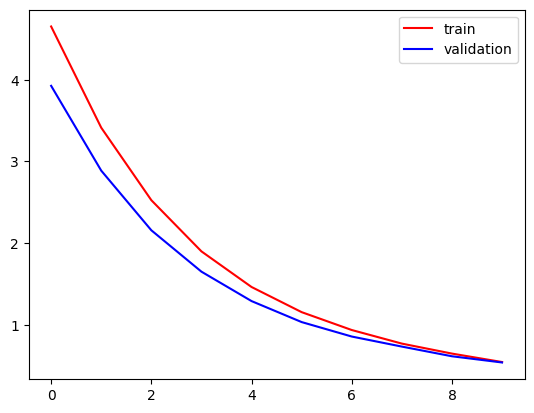

In [49]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()